In [49]:
print("all Ok")

all Ok


In [5]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model_name="deepseek-r1-distill-llama-70b",
    temperature=0
)
response=llm.invoke("what is length of wall of china?")

/Users/shikhasingh/Documents/Code/agenticbatch2/venv/lib/python3.12/site-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(
Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=fbdb3f20-9135-46b7-b3d7-bb59b19332b8,id=fbdb3f20-9135-46b7-b3d7-bb59b19332b8


Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=fbdb3f20-9135-46b7-b3d7-bb59b19332b8,id=fbdb3f20-9135-46b7-b3d7-bb59b19332b8
Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=2ba5934d-484d-439b-9447-b72b9a95874a,id=2ba5934d-484d-439b-9447-b72b9a95874a
Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Una

In [51]:
response

AIMessage(content="<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of miles, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or 21,000 kilometers. But I'm not sure which one is accurate.\n\nI should consider the sources of this information. Maybe some people measure it differently. For example, if you include all the branches and sections, it might add up to a longer distance. But if you just take the main wall, it might be shorter. I think the Chinese government did a survey a while back, so that might be a reliable source.\n\nWait, I think they used advanced technology like GPS and satellites to measure it more a

In [52]:
response.content

"<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of miles, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or 21,000 kilometers. But I'm not sure which one is accurate.\n\nI should consider the sources of this information. Maybe some people measure it differently. For example, if you include all the branches and sections, it might add up to a longer distance. But if you just take the main wall, it might be shorter. I think the Chinese government did a survey a while back, so that might be a reliable source.\n\nWait, I think they used advanced technology like GPS and satellites to measure it more accurately. That wo

## This is my custom tools

In [12]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

## Importing the inbuilt tool

In [13]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [55]:
search.invoke("what is the latest update on iphone17 release?")

"Forbes iOS 26 Release Date: Exactly When The New iPhone Software Will Launch By David Phelan. This gives us three possible pairs of dates: Tuesday, Sept. 2 or Wednesday, Sept. 3, Tuesday, Sept. 9 ... The iPhone 17 lineup brings significant technological improvements across design, performance, and functionality. Apple's latest innovations focus on enhanced displays, powerful processing capabilities, and advanced camera systems.. Innovative Design and Display. The iPhone 17 Pro Max features a larger 6.86-inch display, marking a notable size increase. The beta release lets a developer or company test its software program or system to emulate real-world use before a general release. Also: Your CarPlay is getting a major overhaul on iOS 26: 3 new ... Planned for September 2025, the iPhone 17 models could feature larger display sizes, ProMotion across the lineup, Wi-Fi 7, and more. We're still in the middle of the iPhone 16 release cycle, but ... CUPERTINO, CALIFORNIA Apple today previewed

In [56]:
# !pip install duckduckgo_search


In [57]:
tools=[multiply, add, divide, search]

In [58]:
llm_with_tools=llm.bind_tools(tools)

In [59]:
response=llm_with_tools.invoke("hi")

In [60]:
response

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 392, 'total_tokens': 504, 'completion_time': 0.586357522, 'prompt_time': 0.025298602, 'queue_time': 0.009786757000000004, 'total_time': 0.611656124}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--040592b5-7ef2-49df-b59d-e1c71578add1-0', usage_metadata={'input_tokens': 392, 'output_tokens': 112, 'total_tokens': 504})

In [61]:
response.content

'Hello! How can I assist you today?'

In [62]:
response.tool_calls

[]

In [63]:
response=llm_with_tools.invoke("what is 2+2?")

In [64]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'fck4ef5g9', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 164, 'prompt_tokens': 398, 'total_tokens': 562, 'completion_time': 0.648604649, 'prompt_time': 0.032320207, 'queue_time': 0.009826365000000004, 'total_time': 0.680924856}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--86b3d569-12c1-4373-8143-98d4d67724d0-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'fck4ef5g9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 398, 'output_tokens': 164, 'total_tokens': 562})

In [65]:
response.content

''

In [66]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'fck4ef5g9',
  'type': 'tool_call'}]

In [67]:
response=llm_with_tools.invoke("what is 10/2?")

In [68]:
response.content

''

In [69]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 10, 'b': 2},
  'id': 'mva5m2qc9',
  'type': 'tool_call'}]

In [70]:
response=llm_with_tools.invoke("what is a current age of the TATA Group?")

In [71]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '8mzmb0y71', 'function': {'arguments': '{"query":"TATA Group founding year"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 347, 'prompt_tokens': 402, 'total_tokens': 749, 'completion_time': 1.5081484569999999, 'prompt_time': 0.026047849, 'queue_time': 0.009948024999999996, 'total_time': 1.5341963060000001}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--dd6b7e78-f3de-4ae0-b2dd-b54764f50dde-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'TATA Group founding year'}, 'id': '8mzmb0y71', 'type': 'tool_call'}], usage_metadata={'input_tokens': 402, 'output_tokens': 347, 'total_tokens': 749})

In [72]:
response.content

''

In [73]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'TATA Group founding year'},
  'id': '8mzmb0y71',
  'type': 'tool_call'}]

In [74]:
# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

In [75]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."



In [76]:
user_query=["tell me what is 2+2"]

In [77]:
[SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [78]:
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

In [47]:
def function_1(state:MessagesState):
    
    #Gets the current conversation messages from the state
    user_question=state["messages"]
    print(user_question)

    SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."

    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    #Returns the new state with the LLM's response added to the message history
    return {
        "messages":[response]
    }
    
    

In [22]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [80]:
builder=StateGraph(MessagesState)

In [81]:
builder.add_node("llm_decision_step",function_1)

In [82]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x10b1dcd60>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x10d1f1bc0>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x10d10c0e0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backen

In [33]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

NameError: name 'builder' is not defined

In [84]:
builder.add_edge(START,"llm_decision_step")

In [32]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)


NameError: name 'builder' is not defined

tools_condition: 
"""Used in the conditional_edge to route to the ToolNode if the last message has tool calls. Otherwise, route to the end."""

class ToolNode(RunnableCallable):
    """A node that runs the tools called in the last AIMessage."""

In [86]:
builder.add_edge("tools","llm_decision_step")

In [87]:
react_graph=builder.compile()

In [37]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

NameError: name 'react_graph' is not defined

In [89]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]

In [90]:
react_graph.invoke({"messages":message})

[HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='2a2c9767-7bf0-4c3a-812f-824697257116')]
[HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='2a2c9767-7bf0-4c3a-812f-824697257116'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'dvekz4xmw', 'function': {'arguments': '{"query":"Narendra Modi age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 303, 'prompt_tokens': 423, 'total_tokens': 726, 'completion_time': 1.156675681, 'prompt_time': 0.034725947, 'queue_time': 0.009903536999999997, 'total_time': 1.191401628}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d5606fbe-a443-48c0-995f-5b83be038971-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Narendra Modi age'}, 'id': 'dvekz

{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='2a2c9767-7bf0-4c3a-812f-824697257116'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'dvekz4xmw', 'function': {'arguments': '{"query":"Narendra Modi age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 303, 'prompt_tokens': 423, 'total_tokens': 726, 'completion_time': 1.156675681, 'prompt_time': 0.034725947, 'queue_time': 0.009903536999999997, 'total_time': 1.191401628}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d5606fbe-a443-48c0-995f-5b83be038971-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Narendra Modi age'}, 'id': 'dvekz4xmw', 'type': 'tool_call'}], usage_metadata={'input_tokens': 423, 'output_tokens': 303, 'total_tokens': 726}),
  ToolMessage(content='Na

In [91]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]

In [92]:
react_graph.invoke({"messages":message})

[HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='d80bdcfe-e616-4726-9fbb-860f0c357243')]
[HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='d80bdcfe-e616-4726-9fbb-860f0c357243'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'wva6bberh', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 538, 'prompt_tokens': 427, 'total_tokens': 965, 'completion_time': 1.981868929, 'prompt_time': 0.027382855, 'queue_time': 0.024581659000000002, 'total_time': 2.009251784}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3c8b302b-99d6-4b82-b39a-cccf15935d4b-0', tool_calls=[{'name': 'duckduckgo_search', 'ar

{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='d80bdcfe-e616-4726-9fbb-860f0c357243'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'wva6bberh', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 538, 'prompt_tokens': 427, 'total_tokens': 965, 'completion_time': 1.981868929, 'prompt_time': 0.027382855, 'queue_time': 0.024581659000000002, 'total_time': 2.009251784}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3c8b302b-99d6-4b82-b39a-cccf15935d4b-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Elon Musk net worth 2023'}, 'id': 'wva6bberh', 'type': 'tool_call'}], usage_metadata={'input_tokens': 427, 'output_tokens': 538, 'total_tokens

In [93]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]

In [95]:
react_graph.invoke({"messages":message})

[HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='94f159e9-7a47-4a2c-a13b-2f5732f81b96')]
[HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='94f159e9-7a47-4a2c-a13b-2f5732f81b96'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'y3hn8v19t', 'function': {'arguments': '{"a":299792000,"b":10}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 424, 'prompt_tokens': 426, 'total_tokens': 850, 'completion_time': 1.541818182, 'prompt_time': 0.034993919, 'queue_time': 0.009910208000000004, 'total_time': 1.576812101}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c355e2a3-0f5d-4a26-a61a-58c40ff743c6-0', tool_calls=[{'name': 'multiply', 'args': {'a': 299792000, 'b': 10}, 'id': 

{'messages': [HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='94f159e9-7a47-4a2c-a13b-2f5732f81b96'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'y3hn8v19t', 'function': {'arguments': '{"a":299792000,"b":10}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 424, 'prompt_tokens': 426, 'total_tokens': 850, 'completion_time': 1.541818182, 'prompt_time': 0.034993919, 'queue_time': 0.009910208000000004, 'total_time': 1.576812101}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c355e2a3-0f5d-4a26-a61a-58c40ff743c6-0', tool_calls=[{'name': 'multiply', 'args': {'a': 299792000, 'b': 10}, 'id': 'y3hn8v19t', 'type': 'tool_call'}], usage_metadata={'input_tokens': 426, 'output_tokens': 424, 'total_tokens': 850}),
  ToolMessage(content='2997920000', n

In [98]:
response=react_graph.invoke({"messages":message})

[HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='94f159e9-7a47-4a2c-a13b-2f5732f81b96')]
[HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='94f159e9-7a47-4a2c-a13b-2f5732f81b96'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ntcm384wg', 'function': {'arguments': '{"a":299792000,"b":10}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 454, 'prompt_tokens': 426, 'total_tokens': 880, 'completion_time': 1.650909091, 'prompt_time': 0.027266125, 'queue_time': 0.009796649000000001, 'total_time': 1.678175216}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f38ce184-52b2-4986-a81a-93782982e484-0', tool_calls=[{'name': 'multiply', 'args': {'a': 299792000, 'b': 10}, 'id': 

In [99]:
print(response)

{'messages': [HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='94f159e9-7a47-4a2c-a13b-2f5732f81b96'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ntcm384wg', 'function': {'arguments': '{"a":299792000,"b":10}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 454, 'prompt_tokens': 426, 'total_tokens': 880, 'completion_time': 1.650909091, 'prompt_time': 0.027266125, 'queue_time': 0.009796649000000001, 'total_time': 1.678175216}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f38ce184-52b2-4986-a81a-93782982e484-0', tool_calls=[{'name': 'multiply', 'args': {'a': 299792000, 'b': 10}, 'id': 'ntcm384wg', 'type': 'tool_call'}], usage_metadata={'input_tokens': 426, 'output_tokens': 454, 'total_tokens': 880}), ToolMessage(content='2997920000', name=

In [151]:
response["messages"][-1].content

'The speed of light in meters per second is approximately 299,792,000 m/s. When multiplied by 10, the result is 2,997,920,000 m/s.'

In [100]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  multiply (ntcm384wg)
 Call ID: ntcm384wg
  Args:
    a: 299792000
    b: 10
================================= Tool Message =================================
Name: multiply

2997920000
================================== Ai Message ==================================

The speed of light in meters per second is approximately 299,792,000 m/s. When multiplied by 10, the result is 2,997,920,000 m/s.


In [3]:
import yfinance as yf

In [47]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"
     
    

In [48]:
get_stock_price.invoke("AAPL")

'An error occurred while fetching stock data: Failed to perform, curl: (28) Operation timed out after 30002 milliseconds with 0 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.'

In [9]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $316.28.'

In [50]:
tools

[StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x12c2d6020>),
 StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x12c2d6700>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x12c1d1f80>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backen

In [15]:
tools = [add, multiply, divide, search,get_stock_price]

In [16]:
llm_with_tools=llm.bind_tools(tools)

In [17]:
response=llm_with_tools.invoke("can you give me a latest stock price of adani greens?")

In [20]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '4t6rc0sh7', 'function': {'arguments': '{"ticker":"ADANIGREEN.NS"}', 'name': 'get_stock_price'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 209, 'prompt_tokens': 500, 'total_tokens': 709, 'completion_time': 0.891937775, 'prompt_time': 0.032765012, 'queue_time': 0.010189914999999994, 'total_time': 0.924702787}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a5f6dc4a-8e53-462c-b339-23bf179e105d-0', tool_calls=[{'name': 'get_stock_price', 'args': {'ticker': 'ADANIGREEN.NS'}, 'id': '4t6rc0sh7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 500, 'output_tokens': 209, 'total_tokens': 709})

In [18]:
response.content

''

In [25]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': '4t6rc0sh7',
  'type': 'tool_call'}]

In [26]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [40]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

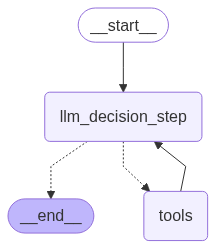

In [41]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))

In [42]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [99]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (hpxrhrp6w)
 Call ID: hpxrhrp6w
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $199.20.
================================== Ai Message ==================================

The result of adding 1000 to the current stock price of Apple is **$1199.20**.


In [51]:
messages = [HumanMessage(content="can you give me 2 times of current stock price of Apple along with the latest news of the Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [52]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

can you give me 2 times of current stock price of Apple along with the latest news of the Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (3mbys3kkn)
 Call ID: 3mbys3kkn
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

An error occurred while fetching stock data: Failed to perform, curl: (7) Failed to connect to query2.finance.yahoo.com port 443 after 11250 ms: Could not connect to server. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (2xf72jbhz)
 Call ID: 2xf72jbhz
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

An error occurred while fetch

In [ ]:
Next class:
1. human in loop
2. agentic RAG
3. multiagent system(collabation and supervisor)
4. some miscellaneous concept of the langgraph: sub graph, parllal execution etc

In [ ]:
Assignment:
    
AI Travel Agent & Expense Planner(Purpose: Trip planning for any city worldwide with Realtime data.")

• Real-time weather information
• Top attractions and activities
• Hotel cost calculation (per day × total days)
• Currency conversion to user's native currency
• Complete itinerary generation
• Total expense calculation
• generate a summary of the entire output

user_input
  |
search attraction and activity
1. search attraction
2. search restaurant
3. search activity
4. search transportation
  |
search weather forcasting
1. get current weather
2. get weather forcast
  |
search hotel costs
1. search hotel
2. estimate the hotel cost
3. budget_range
  |
calculate total cost
1. add
2. multiply
3. calculated total cost
4. calcualate the daily budget
    | 
currency_conversion
1. get exchange rate
2. convert currency
    | 
Itinery generation
1. get day plan
2. create full itinery
    |
create Trip Summary
    |
Return complete travel plan

Note: if you know the OOPS then design this entire system using object and class in modular fashion.


deadline is till next friday 9PM IST


 everyone you can submit the assignments in this form. MAke sure to have one GitHub link and put all the assignments there https://forms.gle/g8RZ4qx8yvNcih4B7    
    